### CONNECT TO DATABASE

In [2]:
import os
from dotenv import load_dotenv

In [3]:
import sqlalchemy

engine = sqlalchemy.create_engine(os.getenv("DATABASE_URL"))
connection = engine.connect()

In [4]:
import pandas as pd

df = pd.read_sql_table('data', con=connection)

In [5]:
df.head()

,index,City,State,lat,lon,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Employed,Unemployment,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Rent,Year,Population,Violent crime,Murder and nonnegligent manslaughter,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson,Crime Rate per 1000,Crime Rating,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Air Quality Index,Nearest
0,0,Anchorage,AK,61.1508,-149.1091,223042,113049,109977,8.0,55.6,5.4,8.0,9.6,2.8,57115.2,7787.0,26841.7,3621.2,586.0,790.2,118993,371.9,73.5,19.5,5.3,0.1,2434.4,1122.2,1508.9,461.0,571.5,74.3,10.9,2.2,3.3,3.7,3.8,17.1,1303,2020,287731,3581,32,540,621,2388,12261,1692,9038,1531,93,55.06,High,183,158,24,1,0,0,0,103,57,26,4,0,0,0,110,69,Good,"1,257,401,37,156"
1,1,Fairbanks,AK,64.8353,-147.6534,60751,32406,28341,5.5,71.2,3.2,6.9,2.8,0.6,41438.3,7688.9,20210.8,2646.6,170.9,198.2,30492,163.9,63.5,26.4,4.1,0.1,708.2,323.1,462.2,256.9,211.9,75.3,11.8,0.9,4.1,2.7,3.3,16.5,1380,2020,31493,247,3,33,52,159,1353,163,1006,184,23,50.80,High,183,132,41,3,7,0,0,167,89,35,1,0,81,1,97,3,Good,"128,290,257,108,391"
2,2,Juneau,AK,58.4546,-134.1739,30216,15465,14750,6.4,66.5,1.0,10.3,6.7,0.9,82937.5,10107.0,39731.2,4833.0,46.9,76.4,16669,27.0,52.3,38.7,8.9,0.1,282.1,88.0,122.8,63.2,43.8,64.3,14.6,5.0,9.1,2.5,4.5,15.3,1486,2020,31810,289,3,24,45,217,1292,187,1012,93,16,49.70,High,177,174,3,0,0,0,0,66,35,13,0,0,0,0,161,16,Good,"252,1,396,218,128"
3,3,Conway,AR,35.0754,-92.4694,82431,40485,41936,5.1,76.2,14.9,0.3,1.1,0.2,30933.4,5323.4,15551.0,2698.9,502.4,566.6,40133,150.3,79.0,14.9,5.5,0.1,903.9,512.9,666.6,277.2,314.3,80.7,10.2,0.1,2.8,2.1,3.4,22.0,898,2020,67336,324,2,49,51,222,1842,177,1567,98,8,32.17,Medium,275,207,66,2,0,0,0,132,59,42,1,4,138,0,132,0,Good,"4,169,268,162,223"
4,4,Conway,AR,35.0754,-92.4694,82431,40485,41936,5.1,76.2,14.9,0.3,1.1,0.2,30933.4,5323.4,15551.0,2698.9,502.4,566.6,40133,150.3,79.0,14.9,5.5,0.1,903.9,512.9,666.6,277.2,314.3,80.7,10.2,0.1,2.8,2.1,3.4,22.0,703,2020,67336,324,2,49,51,222,1842,177,1567,98,8,32.17,Medium,275,207,66,2,0,0,0,132,59,42,1,4,138,0,132,0,Good,"3,169,268,280,162"


### Simpson's Diversity Index

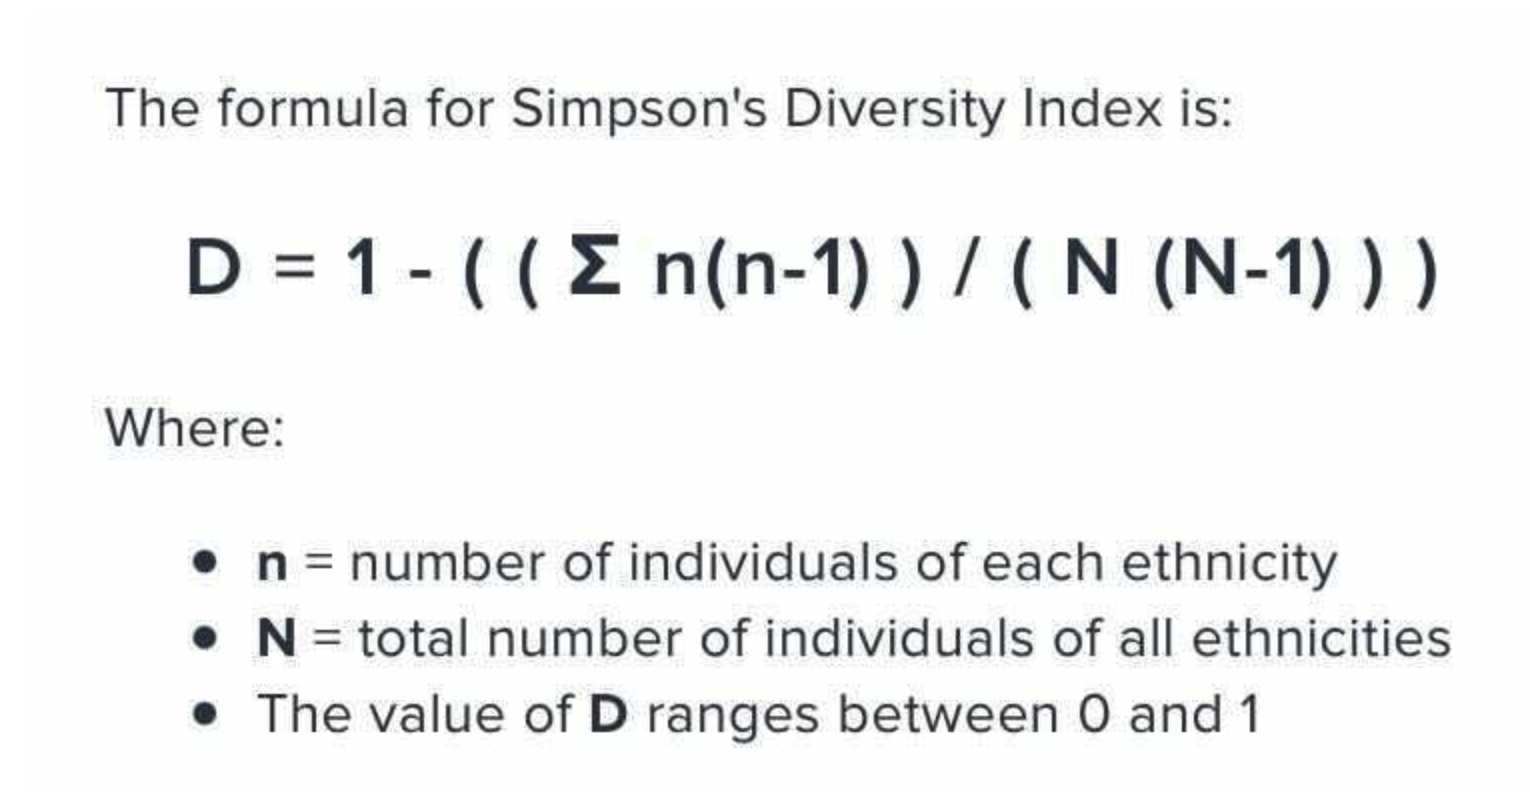

In [6]:
diversity = df[['City', 'State','TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']]

In [7]:
diversity.dtypes

City         object
State        object
TotalPop      int64
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
dtype: object

In [8]:
cols = list(set(list(diversity.columns)) - set(['City', 'State', 'TotalPop']))

In [9]:
diversity['Diversity Index'] = 1
for col in cols:
  diversity[col] = diversity[col]/100
  diversity[col]= diversity[col].multiply(diversity['TotalPop'], axis='index')
  diversity['Diversity Index'] -= ((diversity[col]*(diversity[col]-1))/(diversity['TotalPop']*(diversity['TotalPop']-1)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [10]:
print(diversity.shape)
diversity.head()

(422, 10)


,City,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Diversity Index
0,Anchorage,AK,223042,17843.360,124011.352,12044.268,17843.360,21412.032,6245.176,0.665151
1,Fairbanks,AK,60751,3341.305,43254.712,1944.032,4191.819,1701.028,364.506,0.483432
2,Juneau,AK,30216,1933.824,20093.640,302.160,3112.248,2024.472,271.944,0.538415
3,Conway,AR,82431,4203.981,62812.422,12282.219,247.293,906.741,164.862,0.394425
4,Conway,AR,82431,4203.981,62812.422,12282.219,247.293,906.741,164.862,0.394425


### Check

In [11]:
a = 223042*0.08 
b = 223042*0.556 
c = 223042*0.054 
d = 223042*0.08 
e = 223042*0.096 
f = 223042*0.028
t = 223042

In [12]:
1 - (((a*(a-1)) + (b*(b-1)) + (c*(c-1)) + (d*(d-1)) + (e*(e-1)) + (f*(f-1)))/(t*(t-1)))

0.6651505069292192

### Add Diversity Index to DB

In [13]:
df['Diversity Index'] = diversity['Diversity Index']

In [14]:
df.head()

,index,City,State,lat,lon,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Employed,Unemployment,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Rent,Year,Population,Violent crime,Murder and nonnegligent manslaughter,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson,Crime Rate per 1000,Crime Rating,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Air Quality Index,Nearest,Diversity Index
0,0,Anchorage,AK,61.1508,-149.1091,223042,113049,109977,8.0,55.6,5.4,8.0,9.6,2.8,57115.2,7787.0,26841.7,3621.2,586.0,790.2,118993,371.9,73.5,19.5,5.3,0.1,2434.4,1122.2,1508.9,461.0,571.5,74.3,10.9,2.2,3.3,3.7,3.8,17.1,1303,2020,287731,3581,32,540,621,2388,12261,1692,9038,1531,93,55.06,High,183,158,24,1,0,0,0,103,57,26,4,0,0,0,110,69,Good,"1,257,401,37,156",0.665151
1,1,Fairbanks,AK,64.8353,-147.6534,60751,32406,28341,5.5,71.2,3.2,6.9,2.8,0.6,41438.3,7688.9,20210.8,2646.6,170.9,198.2,30492,163.9,63.5,26.4,4.1,0.1,708.2,323.1,462.2,256.9,211.9,75.3,11.8,0.9,4.1,2.7,3.3,16.5,1380,2020,31493,247,3,33,52,159,1353,163,1006,184,23,50.80,High,183,132,41,3,7,0,0,167,89,35,1,0,81,1,97,3,Good,"128,290,257,108,391",0.483432
2,2,Juneau,AK,58.4546,-134.1739,30216,15465,14750,6.4,66.5,1.0,10.3,6.7,0.9,82937.5,10107.0,39731.2,4833.0,46.9,76.4,16669,27.0,52.3,38.7,8.9,0.1,282.1,88.0,122.8,63.2,43.8,64.3,14.6,5.0,9.1,2.5,4.5,15.3,1486,2020,31810,289,3,24,45,217,1292,187,1012,93,16,49.70,High,177,174,3,0,0,0,0,66,35,13,0,0,0,0,161,16,Good,"252,1,396,218,128",0.538415
3,3,Conway,AR,35.0754,-92.4694,82431,40485,41936,5.1,76.2,14.9,0.3,1.1,0.2,30933.4,5323.4,15551.0,2698.9,502.4,566.6,40133,150.3,79.0,14.9,5.5,0.1,903.9,512.9,666.6,277.2,314.3,80.7,10.2,0.1,2.8,2.1,3.4,22.0,898,2020,67336,324,2,49,51,222,1842,177,1567,98,8,32.17,Medium,275,207,66,2,0,0,0,132,59,42,1,4,138,0,132,0,Good,"4,169,268,162,223",0.394425
4,4,Conway,AR,35.0754,-92.4694,82431,40485,41936,5.1,76.2,14.9,0.3,1.1,0.2,30933.4,5323.4,15551.0,2698.9,502.4,566.6,40133,150.3,79.0,14.9,5.5,0.1,903.9,512.9,666.6,277.2,314.3,80.7,10.2,0.1,2.8,2.1,3.4,22.0,703,2020,67336,324,2,49,51,222,1842,177,1567,98,8,32.17,Medium,275,207,66,2,0,0,0,132,59,42,1,4,138,0,132,0,Good,"3,169,268,280,162",0.394425


In [15]:
df.to_csv('diversity.csv')

In [ ]:
df.to_sql("data", con=engine, method='multi', if_exists='replace')

In [ ]:
pd.read_sql('data', con=engine)